**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle
class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors):
        self.neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.y_labels = np.unique(y)
        self.n_classes = np.shape(self.y_labels)[0]

    def numpy_dist(self, Y):
        X = self.X_train
        x_dist = (X ** 2).sum(axis=1)
        y_dist = (Y ** 2).sum(axis=1)
        xy_dist = X.dot(Y.T)
        dist = - 2 * xy_dist + y_dist + x_dist.reshape(-1, 1)
        dist = np.sqrt(np.abs(dist))
        return dist

    def predict(self, X):
        """
        Default metric: minkowski(p=2), and with p=2
        is equivalent to the standard Euclidean
        """
        n_samples = X.shape[0]
        neighbors = self.neighbors

        Euc_dist = self.numpy_dist(X)

        if neighbors <= 2:
            k_dist = np.argsort(Euc_dist, axis=0)[:1, :]
            y_pred = self.y_train[k_dist]
        else:
            y_pred = np.zeros(n_samples, dtype=self.y_labels[0].dtype)
            k_dist = np.argsort(Euc_dist, axis=0)[:neighbors, :]
            pred_labels = self.y_train[k_dist]

            for i in range(n_samples):
                (_, idx, counts) = np.unique(pred_labels[:, i],
                                             return_index=True,
                                             return_counts=True)
                if np.size(np.unique(counts)) == 1:
                    y_pred[i] = pred_labels[0, i]
                else:
                    y_pred[i] = pred_labels[idx[np.argmax(counts)], i]
        return y_pred

    def predict_proba(self, X):
        n_samples = X.shape[0]
        neighbors = self.neighbors
        n_classes = self.n_classes

        pred_labels = np.zeros((neighbors, n_samples),
                               dtype=self.y_labels[0].dtype)
        probabilities = np.zeros((n_samples, n_classes), dtype=float)

        Euc_dist = self.numpy_dist(X)

        k_dist = np.argsort(Euc_dist, axis=0)[:neighbors, :]

        pred_labels = self.y_train[k_dist].T
        for k in range(n_samples):
            proba_k = np.zeros((n_classes))
            for i, idx in np.ndenumerate(pred_labels[k]):
                proba_k[int(idx)] += 1.0
            normalizer = proba_k.sum()
            proba_k /= normalizer

            probabilities[k] = proba_k

        return probabilities

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

**IRIS**

In [89]:
iris = datasets.load_iris()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.1,
                                                    stratify=iris.target)

In [91]:
clf = KNeighborsClassifier(n_neighbors=3)
my_clf = MyKNeighborsClassifier(n_neighbors=3)

In [92]:
%time clf.fit(X_train, y_train)

Wall time: 1 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [93]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [94]:
%time clf.predict(X_test)

Wall time: 1 ms


array([0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 1, 0, 1])

In [95]:
%time my_clf.predict(X_test)

Wall time: 2 ms


array([0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 1, 0, 1])

In [96]:
%time clf.predict_proba(X_test)

Wall time: 1 ms


array([[1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ]])

In [97]:
%time my_clf.predict_proba(X_test)

Wall time: 1.5 ms


array([[1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ]])

In [98]:
clf.score(X_test, y_test)

0.9333333333333333

In [99]:
my_clf.score(X_test, y_test)

0.9333333333333333

Best score for  16 neighbors


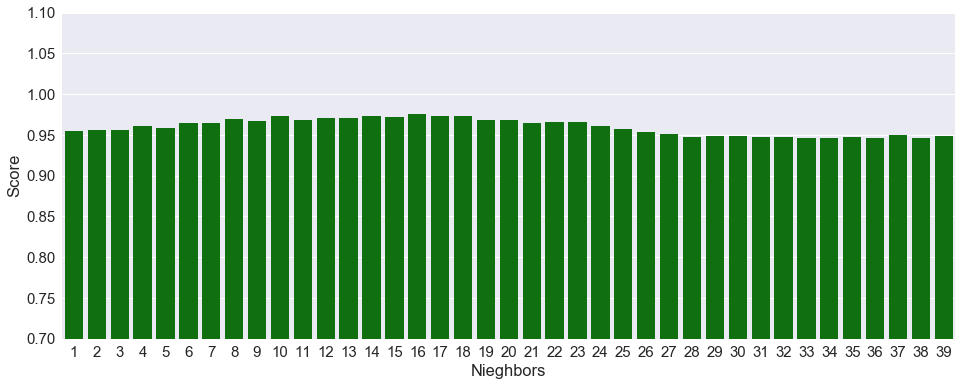

In [5]:
#%%pycodestyle
# Задание 3
iris = datasets.load_iris()
sns.set(rc={'figure.figsize': (16., 6.)})
sns.set(font_scale=1.5)

def scores(X_train, X_test, y_train, y_test, neighbors=np.arange(1, 20)):
    scores = np.empty(len(neighbors))
    for k in neighbors:
        my_clf = MyKNeighborsClassifier(k+1)
        my_clf.fit(X_train, y_train)
        scores[k-1] = my_clf.score(X_test, y_test)
    return scores


count = 300
neighbors = np.arange(1, 40)
score = np.zeros(len(neighbors))
for i in range(count):
    X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                        iris.target,
                                                        test_size=0.1,
                                                        stratify=iris.target)
    score += scores(X_train, X_test, y_train, y_test, neighbors)
score /= count
best_score = np.argmax(score) + 1

data = datasets.base.Bunch(data=score, target=neighbors)
ax = sns.barplot(x="target", y="data", data=data, color="green")
ax.set(xlabel='Nieghbors', ylabel='Score')
ax.set_ybound(0.7, 1.1)

print("Best score for ", best_score, "neighbors")

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

sklearn.utils.Bunch

In [175]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [176]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [ ]:
%time clf.fit(X_train, y_train)

In [ ]:
%time my_clf.fit(X_train, y_train)

In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [23]:
# seaborn
"""
(Python's Statistical Data Visualization Library)
Seaborn - это библиотека для создания красивых и информативных графиков разнообразных статистических данных
на Python. Seaborn стремится сделать визуализацию центральной частью изучения и понимания данных. Библиотека 
включает поддержку структур данных numpy и pandas и статистических методов из scipy и statsmodels. Seaborn использует 
методы библиотеки matplotlib. Seaborn следует рассматривать как дополнение к matplotlib. В общем Seaborn комбинирует мощь
методов библиотеки matplotlib и собственных методов для информативного отображения стат. данных при минимальных затратах
кода
"""
# matplotlib
"""
matplotlib - это бибилиотека двумерной графики для языка программирования python с помощью которой можно создавать 
высококачественные рисунки различных форматов (Подддерживает и 3D графику). Данный пакет поддерживает 
многие виды графиков и диаграмм. Поддерживает форматы изображений: 
Encapsulated PostScript (EPS)
Enhanced Metafile (EMF)
JPEG
PDF
PNG
Postscript
RGBA («сырой» формат)
SVG
SVGZ
TIFF
С помощью Matplotlib можно делать и анимированные изображения.
"""
# train_test_split
"""
sklearn.cross_validation.train_test_split(*arrays, **options)

Split arrays or matrices into random train and test subsets
(разделяет numpy.array на два, причем рандомизированно)
"""
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
"""

"""
# StandardScaler (from sklearn.preprocessing import StandardScaler)
"""
Класс, который используется для вычисления среднего и стандартого отклонения numpy массива и дальнейнего
центрирования и масштабирования
x = np.array([[],[],[]...], dtype = float)
x_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x_scaler.fit(X) # вычислить среднее и стандартное отклонение
x_scaler.transform(x) # Perform standardization by centering and scaling
"""
# ClassifierMixin
"""
В классе определен метод score() для оценки точности kNN
"""
# NeighborsBase
"""
Основной класс для kNN. В нем определены и инициализируются основные параметры такие как используемая метрика,
n_neighbors - k ближайших соседей, а так же метод _fit()
"""
# KNeighborsMixin
"""
Класс, в котором определена функция для нахождения k ближайших соседей. Также функция, которая
возвращает разреженную матрицу в формате CSR, A [i, j] - это вес ребра, соединяющего i с j-тым соседом 
"""
# SupervisedIntegerMixin
"""
В классе определен метод fit, в котором определяются основные targets
"""

"\n(Python's Statistical Data Visualization Library)\nSeaborn - это библиотека для создания красивых и информативных графиков разнообразных статистических данных\nна Python. Seaborn стремится сделать визуализацию центральной частью изучения и понимания данных. Библиотека \nвключает поддержку структур данных numpy и pandas и статистических методов из scipy и statsmodels. Seaborn использует \nметоды библиотеки matplotlib. Seaborn следует рассматривать как дополнение к matplotlib. В общем Seaborn комбинирует мощь\nметодов библиотеки matplotlib и собственных методов для информативного отображения стат. данных при минимальных затратах\n"